In [40]:
import pandas as pd
import matplotlib.pyplot as plt

inv = pd.read_csv("fct_invoice.csv")
cus = pd.read_json("dim_customer.json")

In [41]:
inv

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [42]:
cus.rename(columns={"id": "customer_id"}, inplace=True)
cus

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy 1
### How many unique customers are in the dataset?

In [43]:
unique_cus = cus["customer_id"].nunique()
unique_cus

5191

# Easy 2
### What are the different categories of products available? How many unique categories are there?

In [44]:
cats = pd.unique(inv['category'])
print(cats)
print(len(cats))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


# Easy 3
### Which payment method is the most popular? How many times was it used?

In [45]:
popular_method = inv["payment_method"].value_counts()
popular_method.head(1)

Cash    44447
Name: payment_method, dtype: int64

# Medium 1
### What are the three most popular categories, by total sales?

In [46]:
inv["sales"] = inv["price"] * inv["quantity"]
inv.groupby("category")["sales"].sum().nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

# Medium 2
### What are the total sales attributed to customers over the age of 45?

In [47]:
id_over_45 = cus[cus["age"]>45]["customer_id"]
cus_over_45 = inv[inv["customer_id"].isin(id_over_45)]
cus_over_45["sales"].sum()

82039768.15

# Medium 3
###  How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

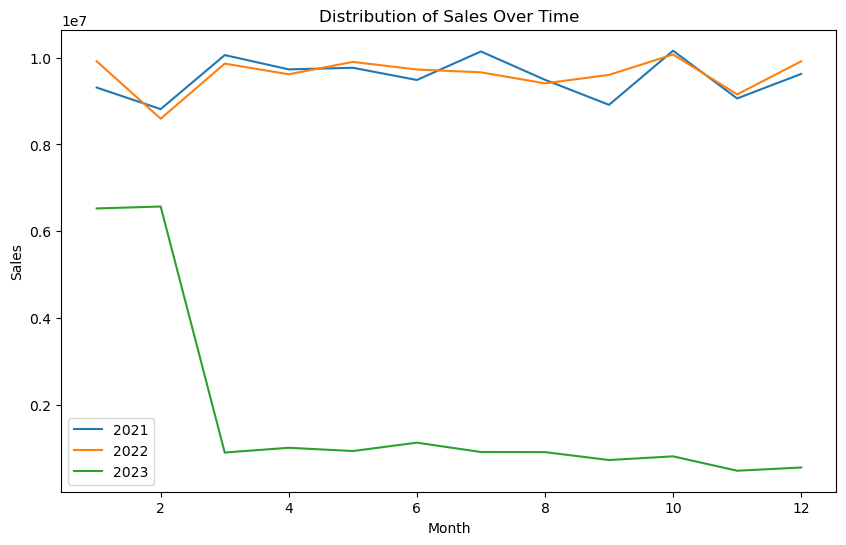

In [49]:
inv["invoice_date"] = pd.to_datetime(inv["invoice_date"])

inv["year"] = inv["invoice_date"].dt.year
inv["month"] = inv["invoice_date"].dt.month

sales_distribution = inv.groupby(["year", "month"])["sales"].sum().reset_index()

plt.figure(figsize=(10, 6))
for year in sales_distribution["year"].unique():
    year_data = sales_distribution[sales_distribution["year"] == year]
    plt.plot(year_data["month"], year_data["sales"], label=str(year))
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Distribution of Sales Over Time")
plt.legend()
plt.show()

# Hard 1
### Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [50]:
cus["decade_age_range"] = pd.cut(cus["age"], bins=range(0, 101, 10), labels=[f"{i}-{i+9}" for i in range(0, 100, 10)])
df = pd.merge(inv, cus, on="customer_id", how="inner")

pivot_table = pd.pivot_table(df, values="sales", index="category", columns="decade_age_range", aggfunc="sum")

pivot_table

decade_age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95,0.0
Clothing,0.0,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04,0.0
Cosmetics,0.0,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80,0.0
Food & Beverage,0.0,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12,0.0
Shoes,0.0,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97,0.0
Souvenir,0.0,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25,0.0
Technology,0.0,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00,0.0
Toys,0.0,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00,0.0
